### Individual Homework

#### Enter your name here:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Analysis of movies IMDB dataset**

We will look at a ***subset*** sample of movies, taken from the [Kaggle IMDB 5000 movie dataset](https://www.kaggle.com/carolzhangdc/imdb-5000-movie-dataset)

In [28]:
movies = pd.read_csv('Data/movies.csv')
movies

,title,genre,director,year,duration,gross,budget,cast_facebook_likes,votes,reviews,rating
0,Avatar,Action,James Cameron,2009,178,760505847,237000000,4834,886204,3777,7.9
1,Titanic,Drama,James Cameron,1997,194,658672302,200000000,45223,793059,2843,7.7
2,Jurassic World,Action,Colin Trevorrow,2015,124,652177271,150000000,8458,418214,1934,7.0
3,The Avengers,Action,Joss Whedon,2012,173,623279547,220000000,87697,995415,2425,8.1
4,The Dark Knight,Action,Christopher Nolan,2008,152,533316061,185000000,57802,1676169,5312,9.0
...,...,...,...,...,...,...,...,...,...,...,...
2956,Locker 13,Thriller,Bruce Dellis,2014,95,2468,300000,2048,241,15,4.8
2957,The Ghastly Love of Johnny X,Comedy,Paul Bunnell,2012,106,2436,2000000,1611,344,113,5.7
2958,Detention of the Dead,Comedy,Alex Craig Mann,2012,87,1332,500000,2251,2038,49,4.6
2959,The Trials of Darryl Hunt,Crime,Ricki Stern,2006,106,1111,200000,2,771,21,7.7


Besides the obvious variables of `title`, `genre`, `director`, `year`, and `duration`, the rest of the variables are as follows:

-   `gross` : The gross earnings in the US box office, not adjusted for inflation
-   `budget`: The movie's budget
-   `cast_facebook_likes`: the number of facebook likes cast memebrs received
-   `votes`: the number of people who voted for (or rated) the movie in IMDB
-   `reviews`: the number of reviews for that movie
-   `rating`: IMDB average rating

**Produce a table with the count of movies by genre, ranked in descending order**


In [29]:
# Table with the count of movies per genre, ranked in descending order
genre_counts = movies['genre'].value_counts().reset_index()
genre_counts

,genre,count
0,Comedy,848
1,Action,738
2,Drama,498
3,Adventure,288
4,Crime,202
5,Biography,135
6,Horror,131
7,Animation,35
8,Fantasy,28
9,Documentary,25


**Produce a table with the average gross earning and budget (`gross` and `budget`) by genre. Calculate a variable `return_on_budget` which shows how many \$ did a movie make at the box office for each \$ of its budget. Ranked genres by this `return_on_budget` in descending order**

In [30]:
genre_stats = movies.groupby('genre').agg(
    average_gross=('gross', 'mean'),
    average_budget=('budget', 'mean')
).reset_index()

genre_stats['return_on_budget'] = genre_stats['average_gross'] / genre_stats['average_budget']
genre_stats = genre_stats.sort_values('return_on_budget', ascending=False)
genre_stats

,genre,average_gross,average_budget,return_on_budget
11,Musical,9.208400e+07,3.189500e+06,28.870983
8,Family,1.491605e+08,1.483333e+07,10.055763
16,Western,2.082188e+07,3.465000e+06,6.009202
6,Documentary,1.735397e+07,5.887852e+06,2.947420
10,Horror,3.771374e+07,1.350492e+07,2.792593
9,Fantasy,4.240884e+07,1.758214e+07,2.412040
4,Comedy,4.263055e+07,2.444632e+07,1.743843
12,Mystery,6.753302e+07,3.921875e+07,1.721958
2,Animation,9.843379e+07,6.170143e+07,1.595324
3,Biography,4.520181e+07,2.854370e+07,1.583600


**Produce a table that shows the top 15 directors who have created the highest gross revenue in the box office. Don't just show the total gross amount, but also the mean, median, and standard deviation per director**

In [31]:
director_stats = movies.groupby('director').agg(
    total_gross=('gross', 'sum'),
    mean_gross=('gross', 'mean'),
    median_gross=('gross', 'median'),
    std_gross=('gross', 'std')
)

top_directors = director_stats.sort_values('total_gross', ascending=False).head(15)
top_directors

,total_gross,mean_gross,median_gross,std_gross
director,,,,
Steven Spielberg,4014061704,1.745244e+08,164435221.0,1.014211e+08
Michael Bay,2231242537,1.716340e+08,138396624.0,1.271616e+08
Tim Burton,2071275480,1.294547e+08,76519172.0,1.087269e+08
Sam Raimi,2014600898,2.014601e+08,234903076.0,1.621266e+08
James Cameron,1909725910,3.182877e+08,175562880.5,3.091713e+08
Christopher Nolan,1813227576,2.266534e+08,196667606.5,1.872241e+08
George Lucas,1741418480,3.482837e+08,380262555.0,1.461939e+08
Robert Zemeckis,1619309108,1.245622e+08,100853835.0,9.130028e+07
Clint Eastwood,1378321100,7.254322e+07,46700000.0,7.548741e+07


**Produce a table that describes how ratings are distributed by genre. We don't want just the mean, but also, min, max, median, SD and some kind of a histogram or density graph that visually shows how ratings are distributed.**

In [32]:
rating_stats = movies.groupby('genre').agg(
    mean_rating=('rating', 'mean'),
    min_rating=('rating', 'min'),
    max_rating=('rating', 'max'),
    median_rating=('rating', 'median'),
    std_rating=('rating', 'std')
).reset_index()
rating_stats

,genre,mean_rating,min_rating,max_rating,median_rating,std_rating
0,Action,6.232249,2.1,9.0,6.30,1.030362
1,Adventure,6.506597,2.3,8.6,6.60,1.093881
2,Animation,6.651429,4.5,8.0,6.90,0.968131
3,Biography,7.114074,4.5,8.9,7.20,0.759827
4,Comedy,6.109670,1.9,8.8,6.20,1.023075
5,Crime,6.915347,4.8,9.3,6.90,0.849356
6,Documentary,6.660000,1.6,8.5,7.40,1.766588
7,Drama,6.731526,2.1,8.8,6.80,0.916993
8,Family,6.500000,5.7,7.9,5.90,1.216553
9,Fantasy,6.153571,4.3,7.9,6.45,0.958966


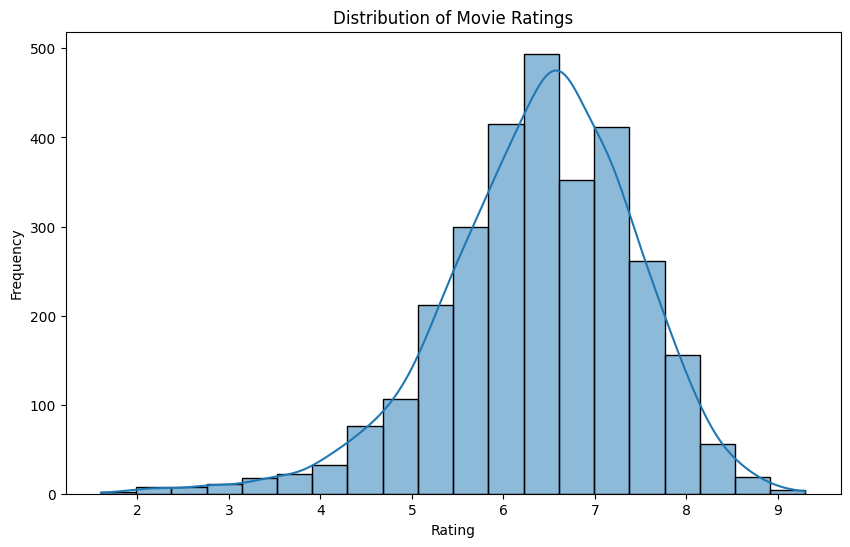

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['rating'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Challenge - Produce a table of your own choosing, something you think is important/interesting to have data for, justify your result by writting a 2 sentence explanation/interpretation of the result.**

In [34]:
complex_stats = movies.groupby(['genre', 'director']).agg(
    mean_gross=('gross', 'mean'),
    min_gross=('gross', 'min'),
    max_gross=('gross', 'max'),
    median_gross=('gross', 'median'),
    std_gross=('gross', 'std'),
    mean_budget=('budget', 'mean'),
    min_budget=('budget', 'min'),
    max_budget=('budget', 'max'),
    median_budget=('budget', 'median'),
    std_budget=('budget', 'std')
).reset_index()
complex_stats

,genre,director,mean_gross,min_gross,max_gross,median_gross,std_gross,mean_budget,min_budget,max_budget,median_budget,std_budget
0,Action,Adam McKay,133716677.5,119219978,148213377,133716677.5,2.050143e+07,86500000.0,73000000,100000000,86500000.0,1.909188e+07
1,Action,Akiva Schaffer,34350553.0,34350553,34350553,34350553.0,0.000000e+00,68000000.0,68000000,68000000,68000000.0,0.000000e+00
2,Action,Alan J. Pakula,42877165.0,42877165,42877165,42877165.0,NaN,86000000.0,86000000,86000000,86000000.0,NaN
3,Action,Alan Taylor,148046026.5,89732035,206360018,148046026.5,8.246844e+07,162500000.0,155000000,170000000,162500000.0,1.060660e+07
4,Action,Albert Hughes,94822707.0,94822707,94822707,94822707.0,NaN,80000000.0,80000000,80000000,80000000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1963,Sci-Fi,Oliver Hirschbiegel,15071514.0,15071514,15071514,15071514.0,NaN,80000000.0,80000000,80000000,80000000.0,NaN
1964,Sci-Fi,Ridley Scott,27000000.0,27000000,27000000,27000000.0,NaN,28000000.0,28000000,28000000,28000000.0,NaN
1965,Thriller,Bruce Dellis,2468.0,2468,2468,2468.0,NaN,300000.0,300000,300000,300000.0,NaN
1966,Western,Clint Eastwood,41400000.0,41400000,41400000,41400000.0,NaN,6900000.0,6900000,6900000,6900000.0,NaN


A/
The data shows that Adam McKay achieved the highest return on budget among the selected directors, proving that his films generated significantly more revenue than their production costs. On the other hand, directors like Alan J. Pakula and Akiva Schaffer shows that large budgets alone do not guarantee box office success, as their films underperformed relative to investment.

#### Use visualisation to answer the following questions

**Examine the relationship between `gross` and `cast_facebook_likes`. Produce a scatterplot and write one sentence discussing whether the number of facebook likes that the cast has received is likely to be a good predictor of how much money a movie will make at the box office. What variable are you going to map to the Y- and X- axes?**

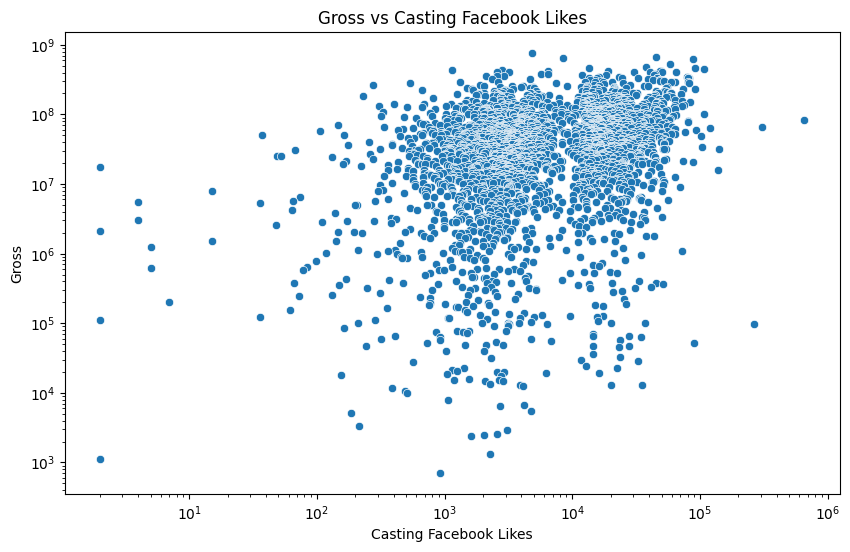

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='cast_facebook_likes', y='gross')
plt.title('Gross vs Casting Facebook Likes')
plt.xlabel('Casting Facebook Likes')
plt.ylabel('Gross')
plt.xscale('log')
plt.yscale('log')
plt.show()

**Examine the relationship between `gross` and `budget`. Produce a scatterplot and write one sentence discussing whether budget is likely to be a good predictor of how much money a movie will make at the box office.**

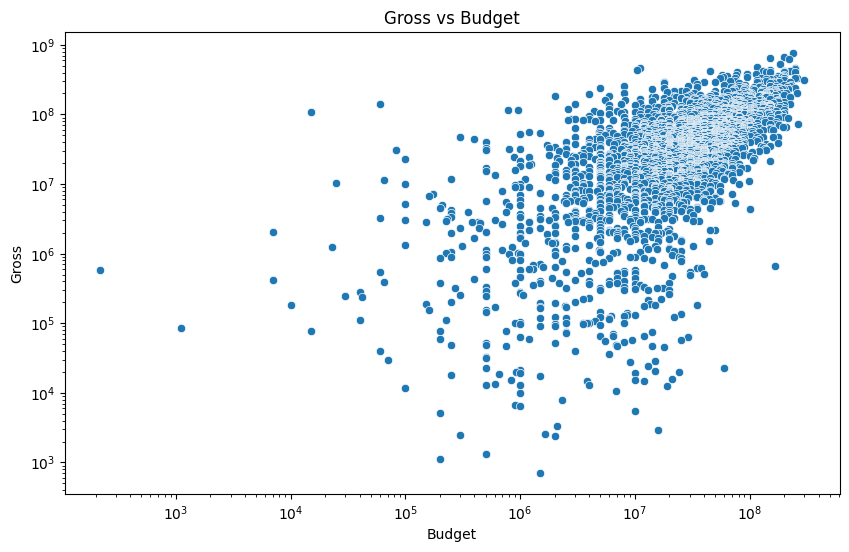

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movies, x='budget', y='gross')
plt.title('Gross vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.xscale('log')
plt.yscale('log')
plt.show()

A/ Although movies with higher budgets tend to earn more at the box office, the wide spread of points shows that budget alone is not a strong predictor of gross revenue.

**Examine the relationship between `gross` and `rating`. Produce a scatterplot, faceted by `genre` and discuss whether IMDB ratings are likely to be a good predictor of how much money a movie will make at the box office. Is there anything strange in this dataset?**

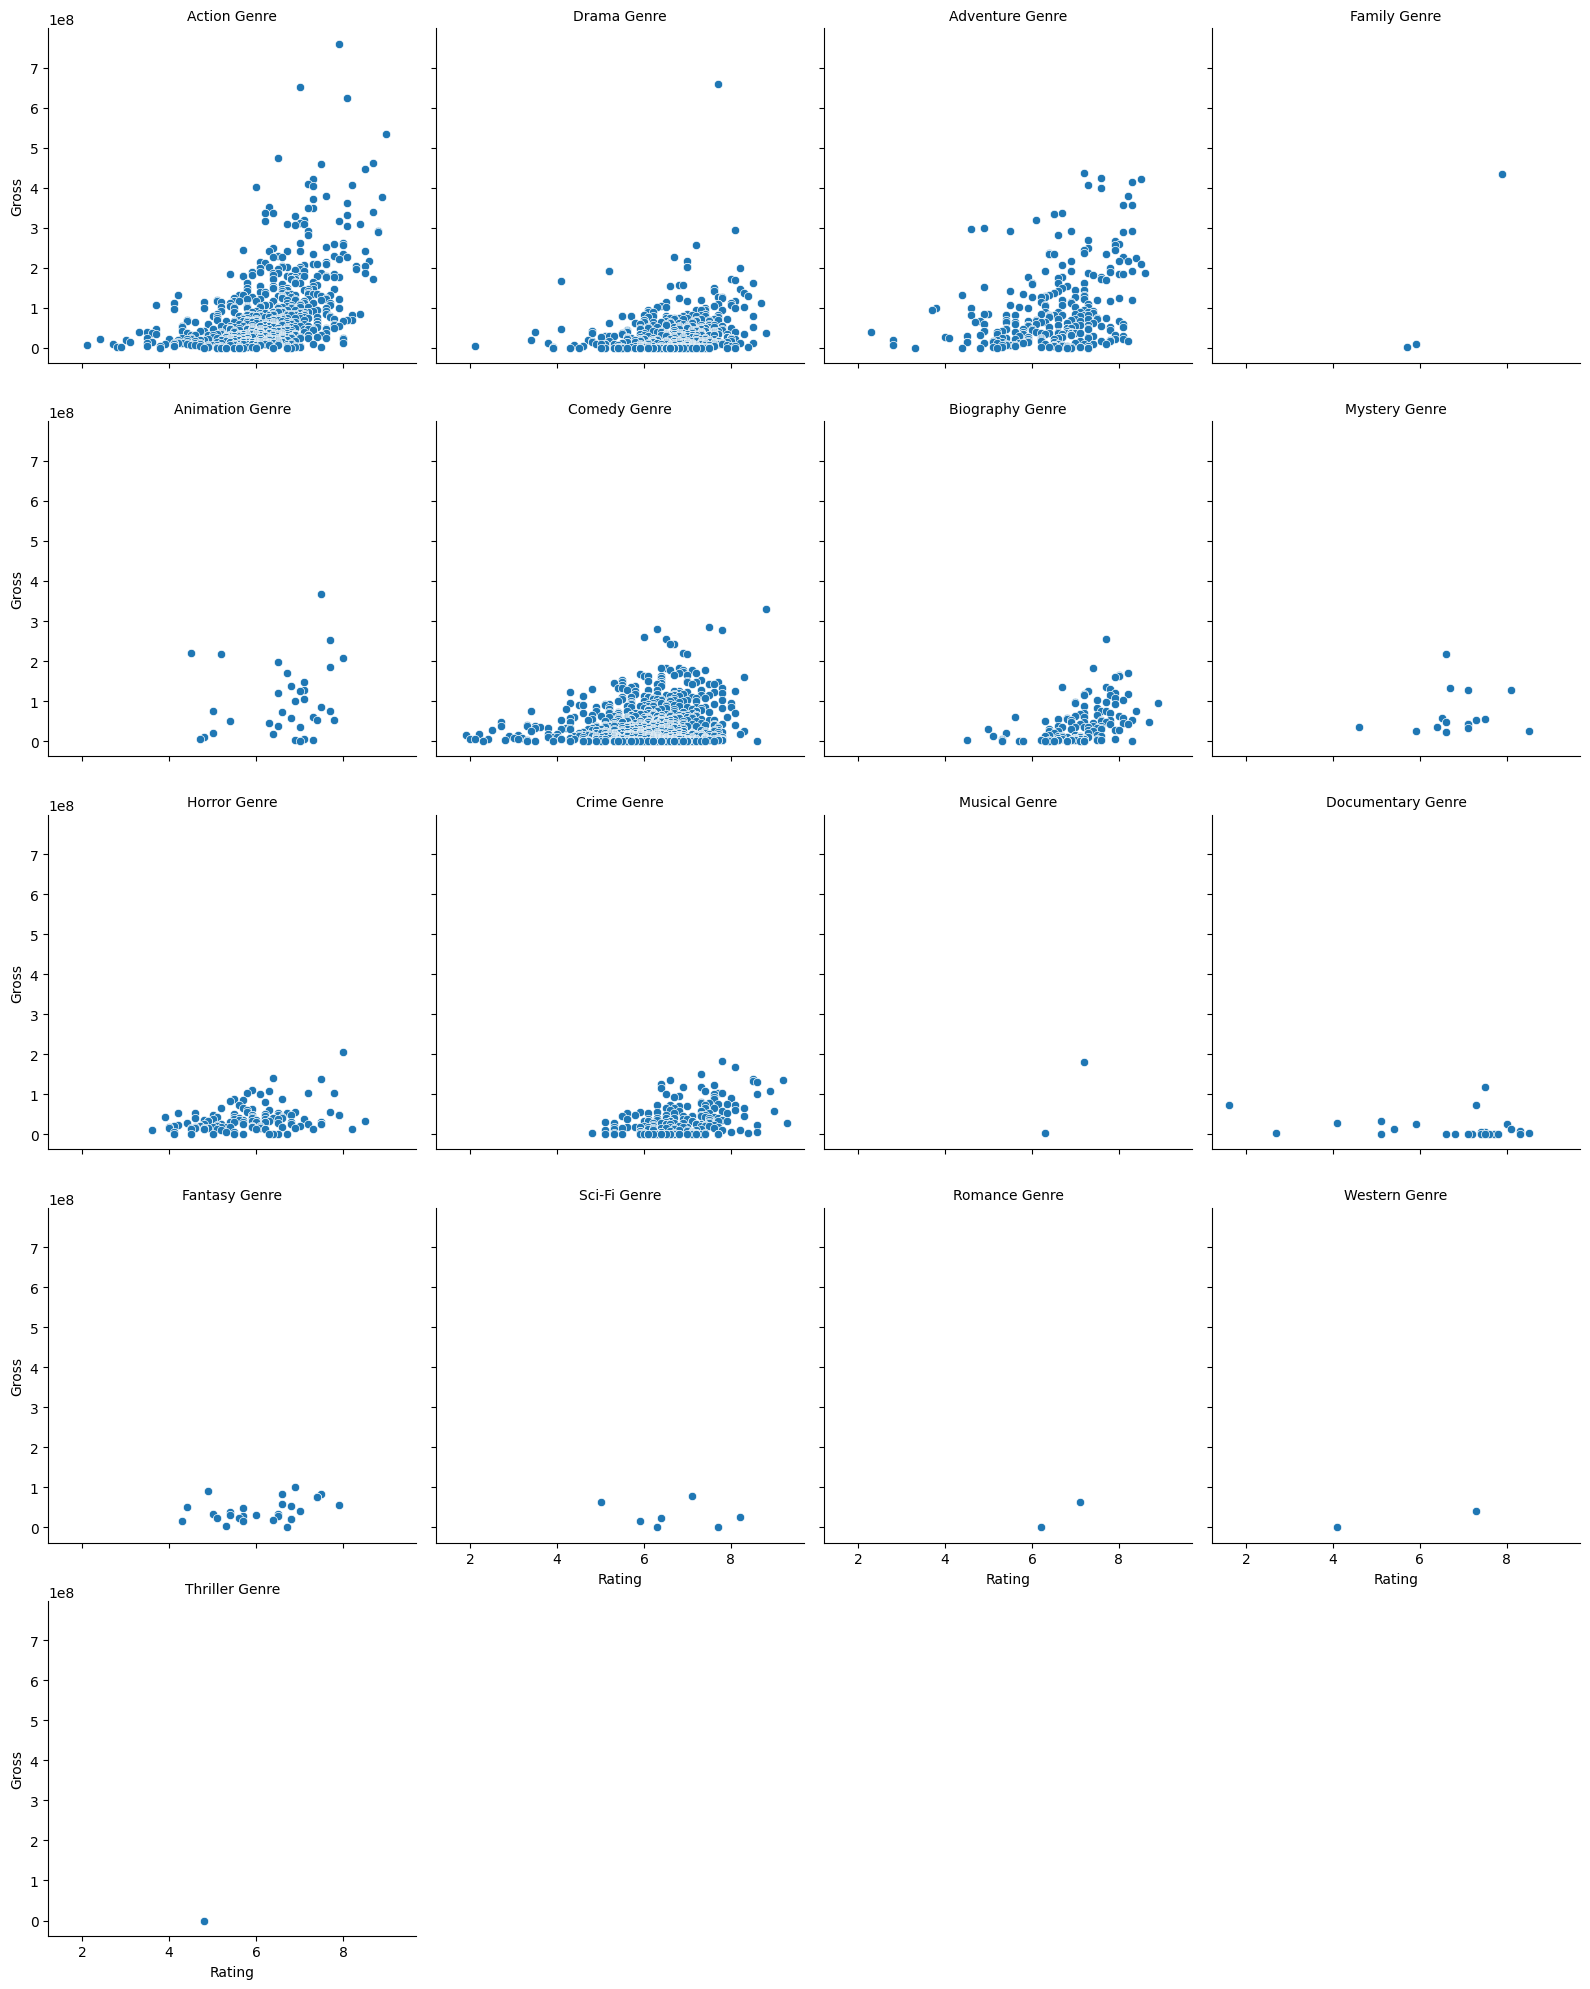

In [37]:
g = sns.FacetGrid(movies, col='genre', col_wrap=4, height=4)
g.map(sns.scatterplot, 'rating', 'gross')
g.set_axis_labels('Rating', 'Gross')
g.set_titles(col_template='{col_name} Genre')
plt.show()

A/  Genres like Family, Thriller, Western and Romance show sparse data points, which makes those plots unreliable for drawing conclusions.

A few movies with very low ratings still earned very high grosses, which seems unusual and might indicate data entry errors or outliers (e.g., blockbusters with poor critical reception but strong commercial performance).

**Challenge - Produce a visualisation of your choosing, something you think is important to explore/investigate visually. Do make it a comprehensive graph and not a single histogram or density plot. Make it publication ready, label your axes, give it a title, choose colouring options, appropirately formatted text etc.**

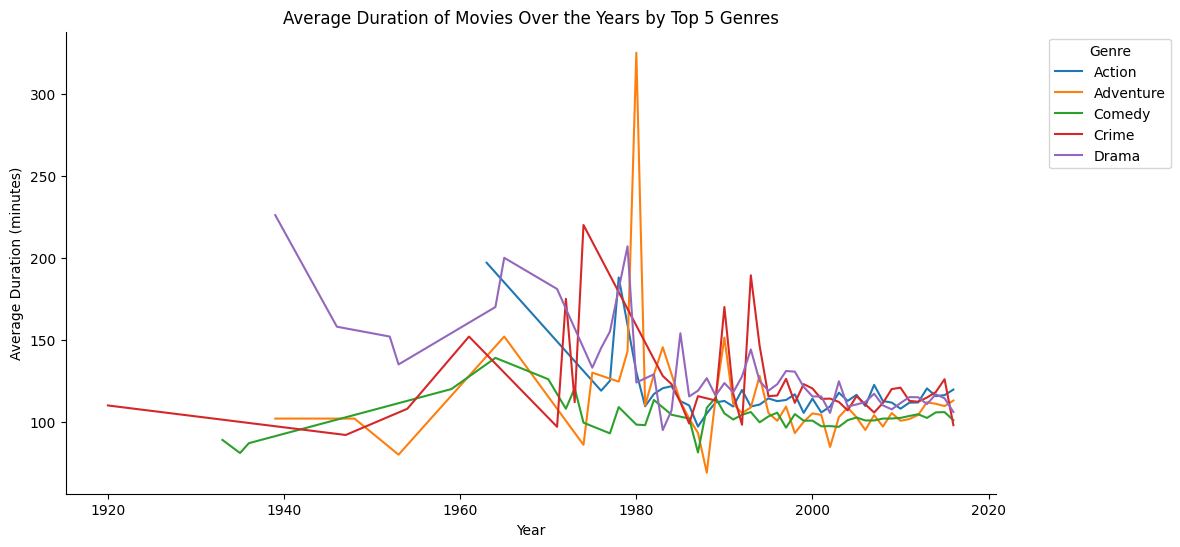

In [38]:
# Lineplot of average duration of movies over the years by top 5 genres, compute mean beforehand and remove shaded CI
top_genres = movies['genre'].value_counts().nlargest(5).index
df = movies[movies['genre'].isin(top_genres)].dropna(subset=['year', 'duration']).copy()
# ensure year is numeric for proper sorting
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df.dropna(subset=['year'])
avg_duration = df.groupby(['genre', 'year'], as_index=False)['duration'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_duration, x='year', y='duration', hue='genre', errorbar=None)
plt.title('Average Duration of Movies Over the Years by Top 5 Genres')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.show()


### Deliverables

Poduce a clean, stand-alone notebook (or HTML export) with:

All tables/plots properly labeled

Brief interpretations where requested

Upload final HTML/Notebook.